# Datasets

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import re
import emoji
from wordcloud import WordCloud
import jieba
import seaborn as sns
from collections import Counter

In [2]:
data_paths = [
    './Datasets/Emotional_Datiing_data_check.json',
    './Datasets/Gamble_data_check.json',
    './Datasets/investment_data_check.json',
    './Datasets/Work_data_check.json'
]

categories = ['emotional_datiing', 'gamble', 'investment', 'work']

In [3]:
# 讀取 JSON 並合併資料
datasets1 = []
for path, category in zip(data_paths, categories):
    with open(path, 'r', encoding='utf-8') as file:
        content = json.load(file)
        if 'thread' in content: 
            # 為每一筆資料加入 category 欄位
            for item in content['thread']:
                item['category'] = category
            datasets1.extend(content['thread'])

df1 = pd.json_normalize(datasets1)
df1

,post_id,text,username,url,category
0,3528827594374693847_53246470008,流量密碼,qingimissu,https://www.threads.net/@qingimissu/post/DD46g...,emotional_datiing
1,3512827533387664484_58259843840,19歲知道男友手機密碼很有安全感29歲戶頭有200萬很有安全感,a7prn,https://www.threads.net/@a7prn/post/DDAEgekyIxk,emotional_datiing
2,3528793108974687479_41467470665,好像是欸昌董的車是流量密碼thumbsup,ouozz0317,https://www.threads.net/@ouozz0317/post/DD4yqL...,emotional_datiing
3,3528521399235069052_64680969021,例如什麼讓我側耳傾聽redheart流量密碼在哪裡,local_sisters_need_you,https://www.threads.net/@local_sisters_need_yo...,emotional_datiing
4,3528610236690527687_56132272433,查崗手機拿來洛燁漫不經心地將手機放在他手心上密碼我生日算了我挺相信你的說罷便將手機還給了他你...,_.0718.venti,https://www.threads.net/@_.0718.venti/post/DD4...,emotional_datiing
...,...,...,...,...,...
20779,3528743702698590954_26493555894,好好工作賺錢吧,xinfang724,https://www.threads.net/@xinfang724/post/DD4nb...,work
20780,3528610149885264679_1984080866,國一大安高工or長庚護專回頭看覺得國一志願設這兩個超不適合自己國二大安高工師大附中許願讀的高...,yyu_0310,https://www.threads.net/@yyu_0310/post/DD4JDxm...,work
20781,3528665065866370957_3630939767,中粉都不用賺錢不用上班嗎,tzulingweng,https://www.threads.net/@tzulingweng/post/DD4V...,work
20782,3528708657716196434_8136480251,原來可是我也疑惑嫌犯偷到手機怎麼沒登入哈哈,without_0830,https://www.threads.net/@without_0830/post/DD4...,work


In [4]:
with open(f'./Llama/dataset/combined_data_unique.json', 'r', encoding='utf-8') as file:
    content = json.load(file)
df2 = pd.DataFrame(content)
df2

,text,category
0,流量密碼,emotional_datiing
1,19歲知道男友手機密碼很有安全感29歲戶頭有200萬很有安全感,emotional_datiing
2,好像是欸昌董的車是流量密碼thumbsup,emotional_datiing
3,例如什麼讓我側耳傾聽redheart流量密碼在哪裡,emotional_datiing
4,查崗手機拿來洛燁漫不經心地將手機放在他手心上密碼我生日算了我挺相信你的說罷便將手機還給了他你...,emotional_datiing
...,...,...
15842,好好工作賺錢吧,work
15843,國一大安高工or長庚護專回頭看覺得國一志願設這兩個超不適合自己國二大安高工師大附中許願讀的高...,work
15844,中粉都不用賺錢不用上班嗎,work
15845,原來可是我也疑惑嫌犯偷到手機怎麼沒登入哈哈,work


In [5]:
datasets3 = []
for i in range(1, 5):  # 讀取 data_1.json ~ data_4.json
    with open(f'./Llama/labeled_datasets/data_{i}.json', 'r', encoding='utf-8') as file:
        data = json.load(file)
        if 'thread' in data:  # 確保 'thread' 存在
            datasets3.extend(data['thread'])

df3 = pd.json_normalize(datasets3)
df3

,text,published_on,id,pk,code,username,user_pic,user_verified,user_pk,user_id,has_audio,reply_count,like_count,images,image_count,videos,url,label
0,我們這邊有缺呦womanraisinghandlightskintone在家工作輕鬆賺飽飽,1730169637,3489238272088311481_59587263059,3489238272088311481,DBsQ7jAhYa5,_hanyu.tw_,https://scontent-iad3-2.cdninstagram.com/v/t51...,False,59587263059,59587263059,None,0,0,None,NaN,None,https://www.threads.net/@_hanyu.tw_/post/DBsQ7...,1
1,現在的女生是怎麼了兼職薪水37520起一支手機就能工作工作輕鬆簡易好上手重點在家就能作業又不...,1733580598,3517851489467803330_8518757602,3517851489467803330,DDR60qSTqbC,xiashitong_1990,https://scontent-iad3-2.cdninstagram.com/v/t51...,False,8518757602,8518757602,None,8,7,None,NaN,None,https://www.threads.net/@xiashitong_1990/post/...,1
2,自營電商這份工作就是傳說中的爽賺又輕鬆你可以待在家或在咖啡廳邊喝咖啡邊工作時間超彈性想去哪就...,1730471504,3491770518582338398_68230585353,3491770518582338398,DB1QslVSCNe,98_findyou,https://scontent-iad3-2.cdninstagram.com/v/t51...,False,68230585353,68230585353,None,7,12,None,NaN,None,https://www.threads.net/@98_findyou/post/DB1Qs...,1
3,請問有沒有在SouthKorea韓國的脆人想要在家工作賺零用錢的moneybagSouthK...,1714919780,3361313202691992871_787282649,3361313202691992871,C6lyIyBSW0n,01_l,https://scontent-iad3-1.cdninstagram.com/v/t51...,False,787282649,787282649,None,82,61,None,NaN,None,https://www.threads.net/@01_l/post/C6lyIyBSW0n,1
4,如果你覺得你學歷不好又沒有特別的一技之長建議有三個工作大家可以去挑戰會有不錯的收入第一做業務...,1733584031,3517880283045768144_59724490747,3517880283045768144,DDSBXqZSyvQ,benson.hearttalk,https://instagram.fagc3-1.fna.fbcdn.net/v/t51....,False,59724490747,59724490747,None,22,394,None,NaN,None,https://www.threads.net/@benson.hearttalk/post...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,如昨天所說集中遇到前波高點櫃買遇到季線反壓短線漲多股出現沉重賣壓是可以預期的BBU今天就跌停...,1733724002,3519054441850951005_53082837972,3519054441850951005,DDWMV6_yVVd,millerstock543,https://scontent-sjc3-1.cdninstagram.com/v/t51...,False,53082837972,53082837972,None,0,0,[469511142_1267903764353038_881834423044184232...,1.0,None,https://www.threads.net/@millerstock543/post/D...,0
180,今日台股部分分析台積電2330目前支撐位在996壓力1006鴻海2317下跌趨勢支撐1963...,1732710641,3510553763071912955_11919131598,3510553763071912955,DC3_gw8z-v7,solutumworks,https://scontent-sjc3-1.cdninstagram.com/v/t51...,False,11919131598,11919131598,None,8,183,None,NaN,None,https://www.threads.net/@solutumworks/post/DC3...,0
181,12月9日台股盤前分析11月的美國就業市場有點像脫韁野馬不但跑回成長軌道非農就業人數狂增22...,1733710865,3518944249704096365_61028370666,3518944249704096365,DDVzSakBCJt,88loverich,https://scontent-sjc3-1.cdninstagram.com/v/t51...,False,61028370666,61028370666,None,2,2,None,NaN,None,https://www.threads.net/@88loverich/post/DDVzS...,0
182,台股分析昨天剛分享馬上打到跌停真希望我能預知樂透grinningfacewithsweatg...,1732762331,3510987368600311582_67156474901,3510987368600311582,DC5iGjkThce,sk12084a23,https://scontent-sjc3-1.cdninstagram.com/v/t51...,False,67156474901,67156474901,None,1,5,[468686079_944721707574351_132974202865171926_...,1.0,None,https://www.threads.net/@sk12084a23/post/DC5iG...,0


In [6]:
with open('./Llama/dataset/training.json', 'r', encoding='utf-8') as file:
    content = json.load(file)
df4 = pd.DataFrame(content)
df4

,text,label,explination
0,流量密碼,0,貼文僅提供「流量密碼」這個模糊的詞語，並無任何具體的內容或資訊，無法判斷其是否為詐騙或誘導性...
1,19歲知道男友手機密碼很有安全感29歲戶頭有200萬很有安全感,1,
2,例如什麼讓我側耳傾聽redheart流量密碼在哪裡,1,貼文尋求非公開的訊息或「流量密碼」，這可能是詐騙者用來誘騙用戶加入不法群組或提供個人資訊的手...
3,查崗手機拿來洛燁漫不經心地將手機放在他手心上密碼我生日算了我挺相信你的說罷便將手機還給了他你...,0,這則貼文是描述一個關於手機與密碼，以及擔心對方忘記生日的對話場景，屬於個人經驗或趣事分享，沒...
4,追星女的摩斯密碼belike,0,貼文內容為引用莫斯密碼的例子，並搭配追星相關的幽默評論，屬於有趣的生活分享內容，並無任何詐騙...
...,...,...,...
13505,跟我一樣rollingonthefloorlaughing聽到台灣才拿手機,0,貼文分享個人在台灣聽到背景音樂的有趣經驗，屬於日常生活分享內容，並無任何詐騙特徵或誘導性。』
13506,國一大安高工or長庚護專回頭看覺得國一志願設這兩個超不適合自己國二大安高工師大附中許願讀的高...,0,
13507,中粉都不用賺錢不用上班嗎,1,貼文內容疑問是否不用工作就能生存，可能反映出對社會經濟狀況或職業觀念的誤解，雖然沒有明確的詐...
13508,原來可是我也疑惑嫌犯偷到手機怎麼沒登入哈哈,0,貼文分享個人對於新聞事件的看法或疑問，未見任何誘導性或詐騙特徵，屬於普通的社交媒體互動內容。』


In [7]:
with open('./Llama/dataset/test/label_test.json', 'r', encoding='utf-8') as file:
    content = json.load(file)

datasets5 = []

for category, items in content.items():
    for item in items:
        datasets5.append({
            'text': item['text'],
            'category': item['category'],
            'label': item['label']
        })

df5 = pd.DataFrame(datasets5)
df5

,text,category,label
0,好像是欸昌董的車是流量密碼thumbsup,emotional_datiing,1
1,玻璃珠戒指創業日記流量密碼,emotional_datiing,1
2,您好社群密碼1997,emotional_datiing,1
3,不負責任翻譯womanraisinghand最近與2pm的成員們有碰面嗎hatchingch...,emotional_datiing,0
4,信一0723覆機Call台機主密碼信一Call台十二少Call你話,emotional_datiing,1
...,...,...,...
2937,要不要考慮叫阿梅先換手機,work,0
2938,感謝稱讚不過我覺得結婚是為了幸福舉辦婚禮也是希望大家見證她的幸福包紅包也不是想要賺錢回本是像...,work,0
2939,給想接觸加密貨幣朋友的建議或許你是在比特幣突破10萬才開始發現並接觸到這塊市場在這邊也先恭喜...,work,0
2940,自己手機較好看齁,work,0


In [8]:
with open('./Llama/traning_dataset_text_V01.json', 'r', encoding='utf-8') as file:
    content = json.load(file)
df6 = pd.DataFrame(content['train'])
df6

,text,label
0,繼之前世錦賽三連撲，又有新作\n地板動作最強的羽球選手 - 李洋🔥\n杭州年終賽小組賽day2,None
1,遮放字體年末大優惠之餘\n還做了心理測驗給大家玩！！！\n\n我測出愛哭包⋯⋯(˙◁˙)\n...,None
2,說不定人家也在忍你呢？\n\n我看過劉嘉玲在某次訪談裡聊婚姻之道，對方問他如何維持？他說「你...,None
3,等下五點半有個餐會，\n時間還沒到，\n會館附近找了間咖啡店，\n然後....我吃飽了！🥲\...,None
4,晚餐吃什麼==,None
...,...,...
27728,那個，不是這種排球少年,None
27729,#迷因撩法 1279\n\n猴洗蛋蛋\n\n------------------------...,None
27730,我肯定要找可以陪我吃那麼多東西的人\n有人要+1嗎\n\n萬事問脆友,None
27731,「為什麼要這麼努力？」\n「因為我不想要因為我的不努力、不願意、不勇敢，而錯過那些，本來可以...,None


In [9]:
df1_texts = set(df1["text"])
df2_texts = set(df2["text"])
df3_texts = set(df3["text"])
df4_texts = set(df4["text"])
df5_texts = set(df5["text"])
df6_texts = set(df6["text"])

print(f"df1 有 {len(df1_texts)} / {len(df1)} 個 unique text (Datasets資料夾)")
print(f"df2 有 {len(df2_texts)} / {len(df2)} 個 unique text (combined_data_unique.json)")
print(f"df3 有 {len(df3_texts)} / {len(df3)} 個 unique text (labeled_datasets資料夾)")
print(f"df4 有 {len(df4_texts)} / {len(df4)} 個 unique text (training.json)")
print(f"df5 有 {len(df5_texts)} / {len(df5)} 個 unique text (label_test.json)")
print(f"df6 有 {len(df6_texts)} / {len(df6)} 個 unique text (traning_dataset_text_V01.json)")

df1 有 15847 / 20784 個 unique text (Datasets資料夾)
df2 有 15847 / 15847 個 unique text (combined_data_unique.json)
df3 有 181 / 184 個 unique text (labeled_datasets資料夾)
df4 有 13510 / 13510 個 unique text (training.json)
df5 有 2335 / 2942 個 unique text (label_test.json)
df6 有 462 / 27733 個 unique text (traning_dataset_text_V01.json)


In [10]:
if df2_texts.issubset(df1_texts):
    print("df1 完全包含 df2 的所有 text")
else:
    print(f"df1 缺少 {len(df2_texts.difference(df1_texts))} 個 df2 的 text，且有 {len(df2_texts.intersection(df1_texts))} 個相同的 text")

if df3_texts.issubset(df1_texts):
    print("df1 完全包含 df3 的所有 text")
else:
    print(f"df1 缺少 {len(df3_texts.difference(df1_texts))} 個 df3 的 text，且有 {len(df3_texts.intersection(df1_texts))} 個相同的 text")

if df4_texts.issubset(df1_texts):
    print("df1 完全包含 df4 的所有 text")
else:
    print(f"df1 缺少 {len(df4_texts.difference(df1_texts))} 個 df4 的 text，且有 {len(df4_texts.intersection(df1_texts))} 個相同的 text")

if df5_texts.issubset(df1_texts):
    print("df1 完全包含 df5 的所有 text")
else:
    print(f"df1 缺少 {len(df5_texts.difference(df1_texts))} 個 df5 的 text，且有 {len(df5_texts.intersection(df1_texts))} 個相同的 text")

if df5_texts.issubset(df4_texts):
    print("df5 完全包含 df4 的所有 text")
else:
    print(f"df5 缺少 {len(df4_texts.difference(df5_texts))} 個 df4 的 text，且有 {len(df4_texts.intersection(df5_texts))} 個相同的 text")

df1 完全包含 df2 的所有 text
df1 缺少 159 個 df3 的 text，且有 22 個相同的 text
df1 完全包含 df4 的所有 text
df1 完全包含 df5 的所有 text
df5 缺少 13510 個 df4 的 text，且有 0 個相同的 text


In [11]:
print(f"datasets         共有 {len(df1_texts)} unique text")
print(f"training + test  共有 {len(df5_texts) + len(df4_texts)} unique text")
print(f"                 缺少 {len(df1_texts) - (len(df5_texts) + len(df4_texts))} unique text")

datasets         共有 15847 unique text
training + test  共有 15845 unique text
                 缺少 2 unique text


In [12]:
print(df1.isnull().sum())

post_id     0
text        0
username    0
url         0
category    0
dtype: int64


In [13]:
print(df2.isnull().sum())

text        0
category    0
dtype: int64


In [14]:
print(df3.isnull().sum())

text               0
published_on       0
id                 0
pk                 0
code               0
username           0
user_pic           0
user_verified      0
user_pk            0
user_id            0
has_audio        181
reply_count        0
like_count         0
images           114
image_count      114
videos           181
url                0
label              0
dtype: int64


In [15]:
print(df4.isnull().sum())

text           0
label          0
explination    0
dtype: int64


In [16]:
print(df5.isnull().sum())

text        0
category    0
label       0
dtype: int64


In [17]:
df5 = df5.drop_duplicates(subset=["text"]).reset_index(drop=True)

In [18]:
# combined_data_unique.json為底 + training.json + label_test.json

# combined_data_unique.json (text, category)
# training.json             (text,           label, explination)
# label_test.json           (text, category, label)

data = df2.merge(df4[['text', 'label', 'explination']], on="text", how="left", suffixes=('', '_df4'))
data = data.merge(df5[['text', 'label']], on="text", how="left", suffixes=('', '_df5'))
data['label'] = data['label'].fillna(data['label_df5'])
data = data.drop(columns=['label_df5'])
data

,text,category,label,explination
0,流量密碼,emotional_datiing,0.0,貼文僅提供「流量密碼」這個模糊的詞語，並無任何具體的內容或資訊，無法判斷其是否為詐騙或誘導性...
1,19歲知道男友手機密碼很有安全感29歲戶頭有200萬很有安全感,emotional_datiing,1.0,
2,好像是欸昌董的車是流量密碼thumbsup,emotional_datiing,1.0,NaN
3,例如什麼讓我側耳傾聽redheart流量密碼在哪裡,emotional_datiing,1.0,貼文尋求非公開的訊息或「流量密碼」，這可能是詐騙者用來誘騙用戶加入不法群組或提供個人資訊的手...
4,查崗手機拿來洛燁漫不經心地將手機放在他手心上密碼我生日算了我挺相信你的說罷便將手機還給了他你...,emotional_datiing,0.0,這則貼文是描述一個關於手機與密碼，以及擔心對方忘記生日的對話場景，屬於個人經驗或趣事分享，沒...
...,...,...,...,...
15842,好好工作賺錢吧,work,0.0,NaN
15843,國一大安高工or長庚護專回頭看覺得國一志願設這兩個超不適合自己國二大安高工師大附中許願讀的高...,work,0.0,
15844,中粉都不用賺錢不用上班嗎,work,1.0,貼文內容疑問是否不用工作就能生存，可能反映出對社會經濟狀況或職業觀念的誤解，雖然沒有明確的詐...
15845,原來可是我也疑惑嫌犯偷到手機怎麼沒登入哈哈,work,0.0,貼文分享個人對於新聞事件的看法或疑問，未見任何誘導性或詐騙特徵，屬於普通的社交媒體互動內容。』


In [19]:
print(len(set(data["text"])))
print(len(data["text"]))

15847
15847


# Data Processing

In [20]:
# 判斷是否為中文（包含一般中文字與全形標點符號）
def extract_chinese(text):
    return "".join(re.findall(r'[\u4e00-\u9fff\u3000-\u303f\uff00-\uffef]+', text))

# 取得所有 emoji 並轉換為對應的英文名稱（去掉底線）
def generate_emoji_set():
    emoji_set = set()
    for emj in emoji.EMOJI_DATA.keys():  # 遍歷所有 emoji
        name = emoji.demojize(emj).strip(":").replace("_", "")  # 去掉 `:` 和 `_`
        emoji_set.add(name)
    return emoji_set

# 產生 emoji 名稱集合
emoji_set = generate_emoji_set()

# 處理 emoji 和網址
def extract_and_clean(text):

    # 找出 emoji 名稱
    emoji_pattern = "|".join(re.escape(name) for name in sorted(emoji_set, key=len, reverse=True))
    found_emojis = re.findall(emoji_pattern, text)

    cleaned_text = re.sub(emoji_pattern, "", text)

    # 找出網址
    urls = re.findall(r'https?[a-zA-Z0-9]+', text)
    for url in urls:
        cleaned_text = cleaned_text.replace(url, "")

    return " ".join(found_emojis), " ".join(urls), cleaned_text.strip(), len(found_emojis), len(urls)


data["text"] = data["text"].fillna("").astype(str)

data["chinese_text"] = data["text"].apply(extract_chinese)
data[["emoji_text", "http_text", "cleaned_text", "emoji_count", "http_count"]] = data["text"].apply(lambda x: pd.Series(extract_and_clean(x)))

data[["text", "chinese_text", "emoji_text", "http_text", "cleaned_text", "emoji_count", "http_count"]]


,text,chinese_text,emoji_text,http_text,cleaned_text,emoji_count,http_count
0,流量密碼,流量密碼,,,流量密碼,0,0
1,19歲知道男友手機密碼很有安全感29歲戶頭有200萬很有安全感,歲知道男友手機密碼很有安全感歲戶頭有萬很有安全感,,,19歲知道男友手機密碼很有安全感29歲戶頭有200萬很有安全感,0,0
2,好像是欸昌董的車是流量密碼thumbsup,好像是欸昌董的車是流量密碼,thumbsup,,好像是欸昌董的車是流量密碼,1,0
3,例如什麼讓我側耳傾聽redheart流量密碼在哪裡,例如什麼讓我側耳傾聽流量密碼在哪裡,redheart,,例如什麼讓我側耳傾聽流量密碼在哪裡,1,0
4,查崗手機拿來洛燁漫不經心地將手機放在他手心上密碼我生日算了我挺相信你的說罷便將手機還給了他你...,查崗手機拿來洛燁漫不經心地將手機放在他手心上密碼我生日算了我挺相信你的說罷便將手機還給了他你...,,,查崗手機拿來洛燁漫不經心地將手機放在他手心上密碼我生日算了我挺相信你的說罷便將手機還給了他你...,0,0
...,...,...,...,...,...,...,...
15842,好好工作賺錢吧,好好工作賺錢吧,,,好好工作賺錢吧,0,0
15843,國一大安高工or長庚護專回頭看覺得國一志願設這兩個超不適合自己國二大安高工師大附中許願讀的高...,國一大安高工長庚護專回頭看覺得國一志願設這兩個超不適合自己國二大安高工師大附中許願讀的高中看...,clownface,,國一大安高工or長庚護專回頭看覺得國一志願設這兩個超不適合自己國二大安高工師大附中許願讀的高...,1,0
15844,中粉都不用賺錢不用上班嗎,中粉都不用賺錢不用上班嗎,,,中粉都不用賺錢不用上班嗎,0,0
15845,原來可是我也疑惑嫌犯偷到手機怎麼沒登入哈哈,原來可是我也疑惑嫌犯偷到手機怎麼沒登入哈哈,,,原來可是我也疑惑嫌犯偷到手機怎麼沒登入哈哈,0,0


In [21]:
data["text_length"] = data["text"].apply(len)
data["cleaned_length"] = data["cleaned_text"].apply(len)
data["chinese_length"] = data["chinese_text"].apply(len)

data[["text", "text_length", "cleaned_length", "chinese_length"]]

,text,text_length,cleaned_length,chinese_length
0,流量密碼,4,4,4
1,19歲知道男友手機密碼很有安全感29歲戶頭有200萬很有安全感,31,31,24
2,好像是欸昌董的車是流量密碼thumbsup,21,13,13
3,例如什麼讓我側耳傾聽redheart流量密碼在哪裡,25,17,17
4,查崗手機拿來洛燁漫不經心地將手機放在他手心上密碼我生日算了我挺相信你的說罷便將手機還給了他你...,72,72,72
...,...,...,...,...
15842,好好工作賺錢吧,7,7,7
15843,國一大安高工or長庚護專回頭看覺得國一志願設這兩個超不適合自己國二大安高工師大附中許願讀的高...,421,412,401
15844,中粉都不用賺錢不用上班嗎,12,12,12
15845,原來可是我也疑惑嫌犯偷到手機怎麼沒登入哈哈,21,21,21


In [22]:
# 找出 explination 欄位為空字串的數量
empty_explination_count = (data["explination"] == "").sum()

print(f"空字串 explination 的數量：{empty_explination_count}")

空字串 explination 的數量：6533


In [23]:
data.isnull().sum()

text                 0
category             0
label                2
explination       2337
chinese_text         0
emoji_text           0
http_text            0
cleaned_text         0
emoji_count          0
http_count           0
text_length          0
cleaned_length       0
chinese_length       0
dtype: int64

In [24]:
data.loc[data['label'].isna(), 'text']

2682    fire大的來了最後上車機會firekeycap1keycap2連勝中loudspeaker...
7529    yenbanknote小資族股票投資純新手教學手把手教你如何定期定額triangularfl...
Name: text, dtype: object

In [25]:
print(data.loc[data['label'].isna(), 'text'].iloc[0])
print(data.loc[data['label'].isna(), 'text'].iloc[1])

fire大的來了最後上車機會firekeycap1keycap2連勝中loudspeaker幣種BTC方向多chartincreasing進9440093700盈9540097200101000損92200福利掛單輕倉跟隨帶好止盈止損流量密碼
yenbanknote小資族股票投資純新手教學手把手教你如何定期定額triangularflag新手教學1你要先開銀行戶和證券戶推薦永豐國泰這兩家很可以介面容易上手定期定額手續費也低2證券戶開通完設定好登入帳號密碼3把錢放入銀行帳戶你設定的交割帳戶你要定期定額扣5000元交割帳戶扣款日前至少要有5000元以上4選擇你要買的ETF標的推薦新手閉著眼睛買0050或006208真的新手買這兩支讓你不去走遠路節省學費會叫你買0093900940這種的文章如果真的買了當作是智商稅5設定你要扣款的金額扣款日期隨便選哪個扣款日都可以月底領薪水就設定月初扣款月初領錢就設定月中glowingstar心理建設1買0050006208就是買大盤買台灣前50大市值的公司就是相信台灣經濟實力2你就白天認真工作晚上休息打砲3沒事不用開證券app沒事不用一直盯盤看市價起伏只要確認銀行有錢可以扣款4要扣多少金額扣你覺得這筆錢拿去投資其餘的錢夠你用生活不會有壓力有人是5000是80005如果覺得現在價格太高沒關係那我推薦你去買新光金股票台股台股投資


In [26]:
nan_indices = data.loc[data['label'].isna()].index
data.at[nan_indices[0], 'label'] = 1
data.at[nan_indices[1], 'label'] = 0

In [27]:
data['http_count'] = data['text'].str.count('http')

# Data Analysis

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15847 entries, 0 to 15846
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   text            15847 non-null  object 
 1   category        15847 non-null  object 
 2   label           15847 non-null  float64
 3   explination     13510 non-null  object 
 4   chinese_text    15847 non-null  object 
 5   emoji_text      15847 non-null  object 
 6   http_text       15847 non-null  object 
 7   cleaned_text    15847 non-null  object 
 8   emoji_count     15847 non-null  int64  
 9   http_count      15847 non-null  int64  
 10  text_length     15847 non-null  int64  
 11  cleaned_length  15847 non-null  int64  
 12  chinese_length  15847 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1.6+ MB


In [29]:
data.describe()

,label,emoji_count,http_count,text_length,cleaned_length,chinese_length
count,15847.000000,15847.000000,15847.000000,15847.000000,15847.000000,15847.000000
mean,0.451947,1.620117,0.079132,144.662207,123.578595,110.485959
std,0.497701,3.457200,0.406992,140.743628,124.193627,115.620656
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,38.000000,30.000000,27.000000
50%,0.000000,0.000000,0.000000,88.000000,70.000000,60.000000
75%,1.000000,2.000000,0.000000,214.000000,182.000000,155.000000
max,1.000000,94.000000,5.000000,1320.000000,485.000000,461.000000


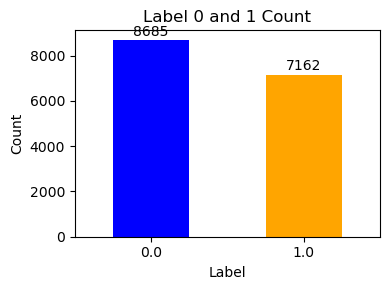

In [30]:
# 計算 label 欄位中 0 和 1 的數量
label_counts = data['label'].value_counts()

# 繪製條形圖
plt.figure(figsize=(4, 3))
label_counts.plot(kind='bar', color=['blue', 'orange'])

# 在每個條形上顯示數字
for i, count in enumerate(label_counts):
    plt.text(i, count + 50, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Label 0 and 1 Count')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

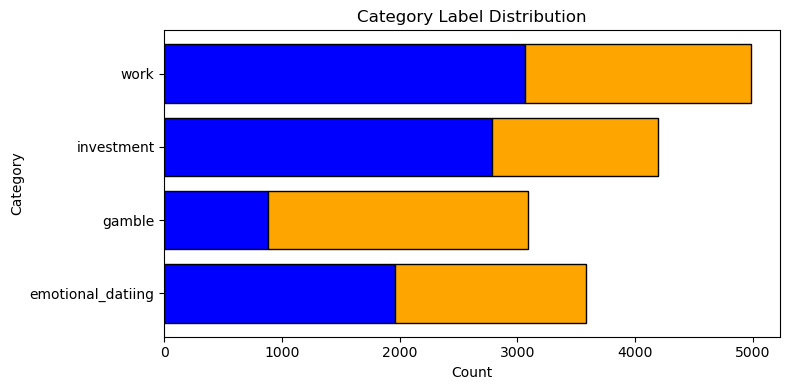

In [31]:
# 假設這是每個 category 中 label 0 和 1 的數量
category_label_counts = data.groupby('category')['label'].value_counts().unstack(fill_value=0)

# 設定條形圖的大小
plt.figure(figsize=(8, 4))

# 設定條形的位置
categories = category_label_counts.index

# 繪製每個 category 的條形
for i, category in enumerate(categories):
    # label 1 的高度
    label_1_count = category_label_counts.loc[category, 1]
    # label 0 的高度
    label_0_count = category_label_counts.loc[category, 0]
    
    # 繪製 label 0 的條形 (下半部)
    plt.barh(i, label_0_count, color='blue', edgecolor='black')
    # 繪製 label 1 的條形 (上半部)
    plt.barh(i, label_1_count, color='orange', left=label_0_count, edgecolor='black')

# 設定標題和軸標籤
plt.title('Category Label Distribution')
plt.xlabel('Count')
plt.ylabel('Category')

# 顯示類別名稱 (x軸標籤)
plt.yticks(range(len(categories)), categories)

# 顯示圖表
plt.tight_layout()
plt.show()

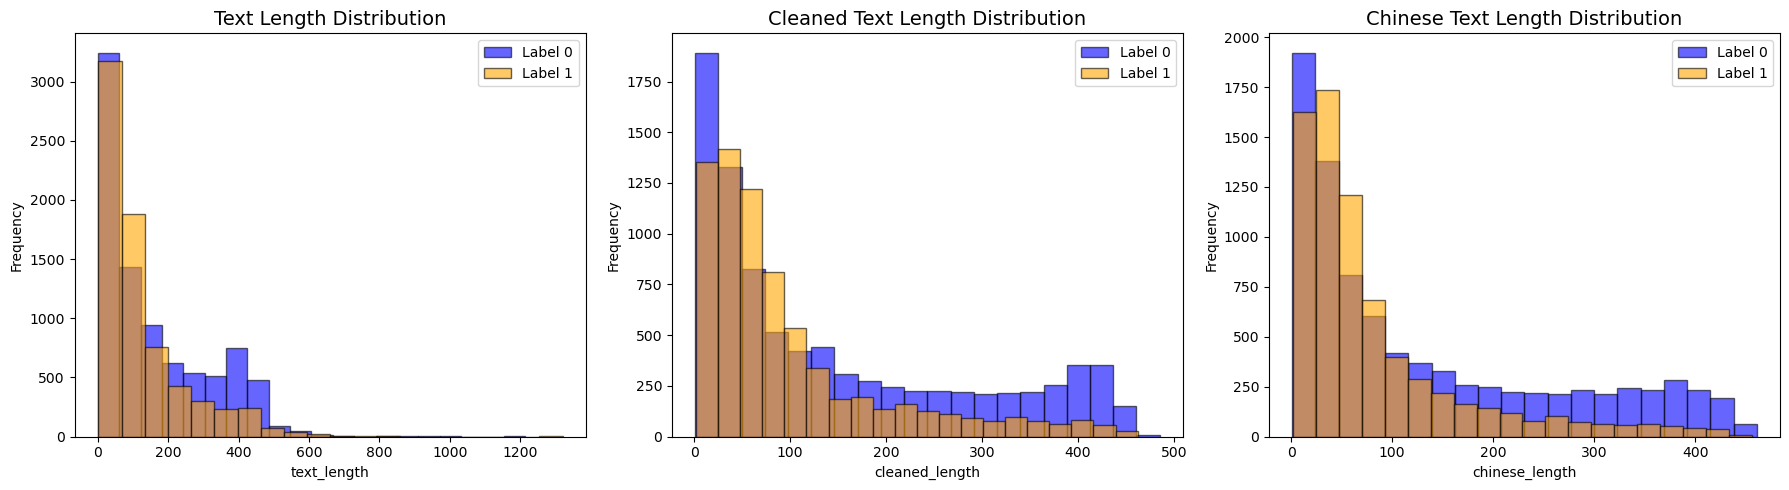

In [32]:
# 分為 label 0 和 label 1
data_label_0 = data[data["label"] == 0]
data_label_1 = data[data["label"] == 1]

# 設定要繪製的變數與標題
features = ["text_length", "cleaned_length", "chinese_length"]
titles = ["Text Length Distribution", "Cleaned Text Length Distribution", "Chinese Text Length Distribution"]

# 建立 1x3 子圖
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 一行三列的佈局

# 繪製每個特徵的直方圖
for i, feature in enumerate(features):
    ax = axes[i]

    # 繪製 label 0 的條形圖 (藍色)
    n0, bins0, patches0 = ax.hist(data_label_0[feature], bins=20, color="blue", edgecolor="black", alpha=0.6, label="Label 0")

    # 繪製 label 1 的條形圖 (橘色)
    n1, bins1, patches1 = ax.hist(data_label_1[feature], bins=20, color="orange", edgecolor="black", alpha=0.6, label="Label 1")

    # 設定標題和軸標籤
    ax.set_title(titles[i], fontsize=14)
    ax.set_xlabel(feature)
    ax.set_ylabel("Frequency")
    ax.legend()

# 調整佈局，確保圖表不重疊
plt.tight_layout()
plt.show()


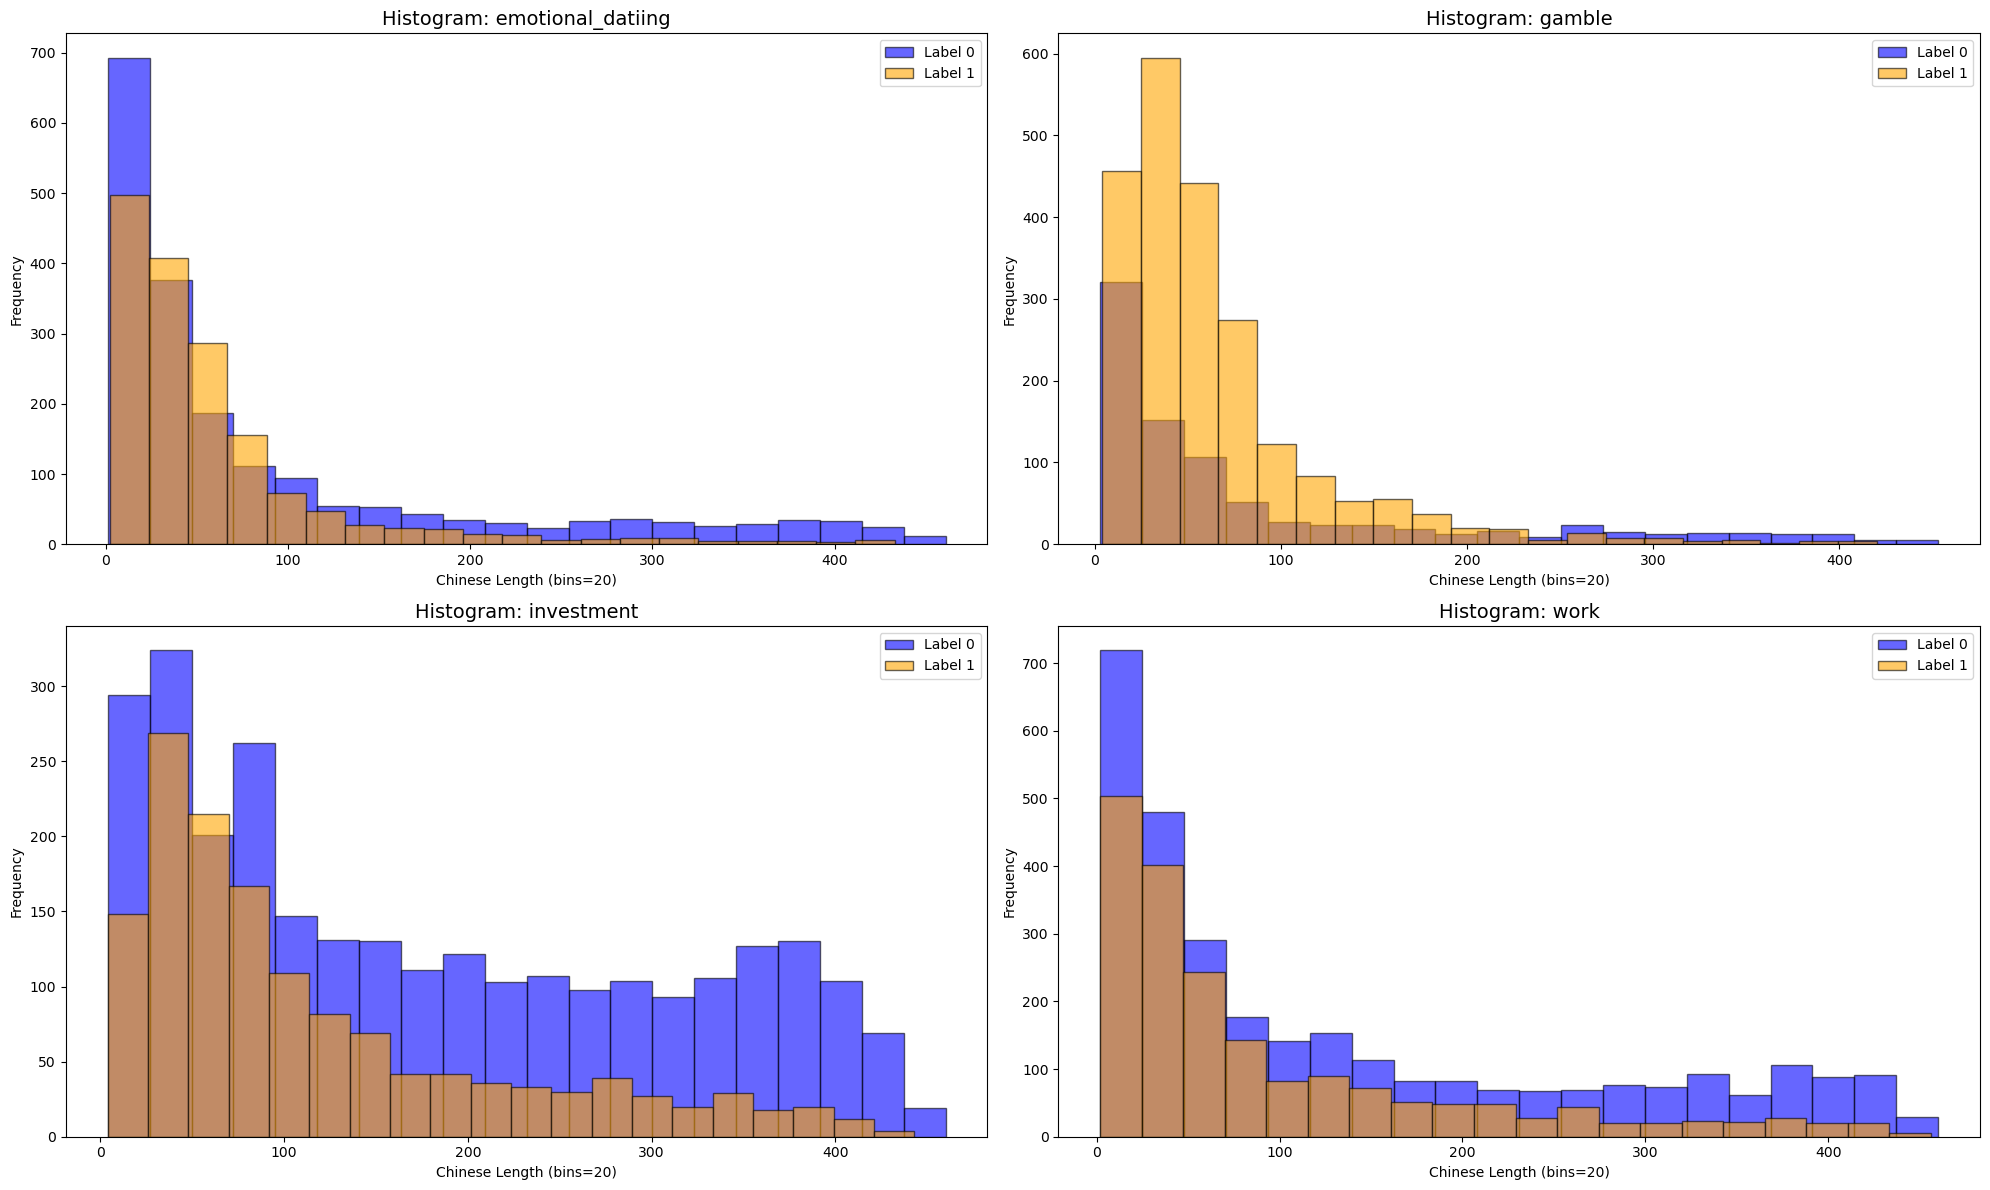

In [33]:
# 設定顏色對應（label 0 藍色，label 1 橘色）
label_palette = {0: "blue", 1: "orange"}

# 設定四個類別
categories = ['emotional_datiing', 'gamble', 'investment', 'work']

# 分離 label 0 和 label 1
data_label_0 = data[data["label"] == 0]
data_label_1 = data[data["label"] == 1]

# 建立 2x2 子圖
fig, axes = plt.subplots(2, 2, figsize=(20, 12))  # 2x2 排列
axes = axes.flatten()  # 展平成 1D 陣列，方便迭代

# 依序繪製每個 category
for i, category in enumerate(categories):
    ax = axes[i]  # 選擇對應的 subplot
    
    # 過濾出該 category 的資料
    category_data_label_0 = data_label_0[data_label_0["category"] == category]
    category_data_label_1 = data_label_1[data_label_1["category"] == category]
    
    # 繪製 label 0 的條形圖 (藍色)
    ax.hist(category_data_label_0["chinese_length"], bins=20, color="blue", edgecolor="black", alpha=0.6, label="Label 0")
    
    # 繪製 label 1 的條形圖 (橘色)
    ax.hist(category_data_label_1["chinese_length"], bins=20, color="orange", edgecolor="black", alpha=0.6, label="Label 1")
    
    # 設定標題與軸標籤
    ax.set_title(f"Histogram: {category}", fontsize=14)
    ax.set_xlabel("Chinese Length (bins=20)")
    ax.set_ylabel("Frequency")
    
    # 自動顯示圖例
    ax.legend()

# 調整子圖間距
plt.tight_layout()
plt.show()

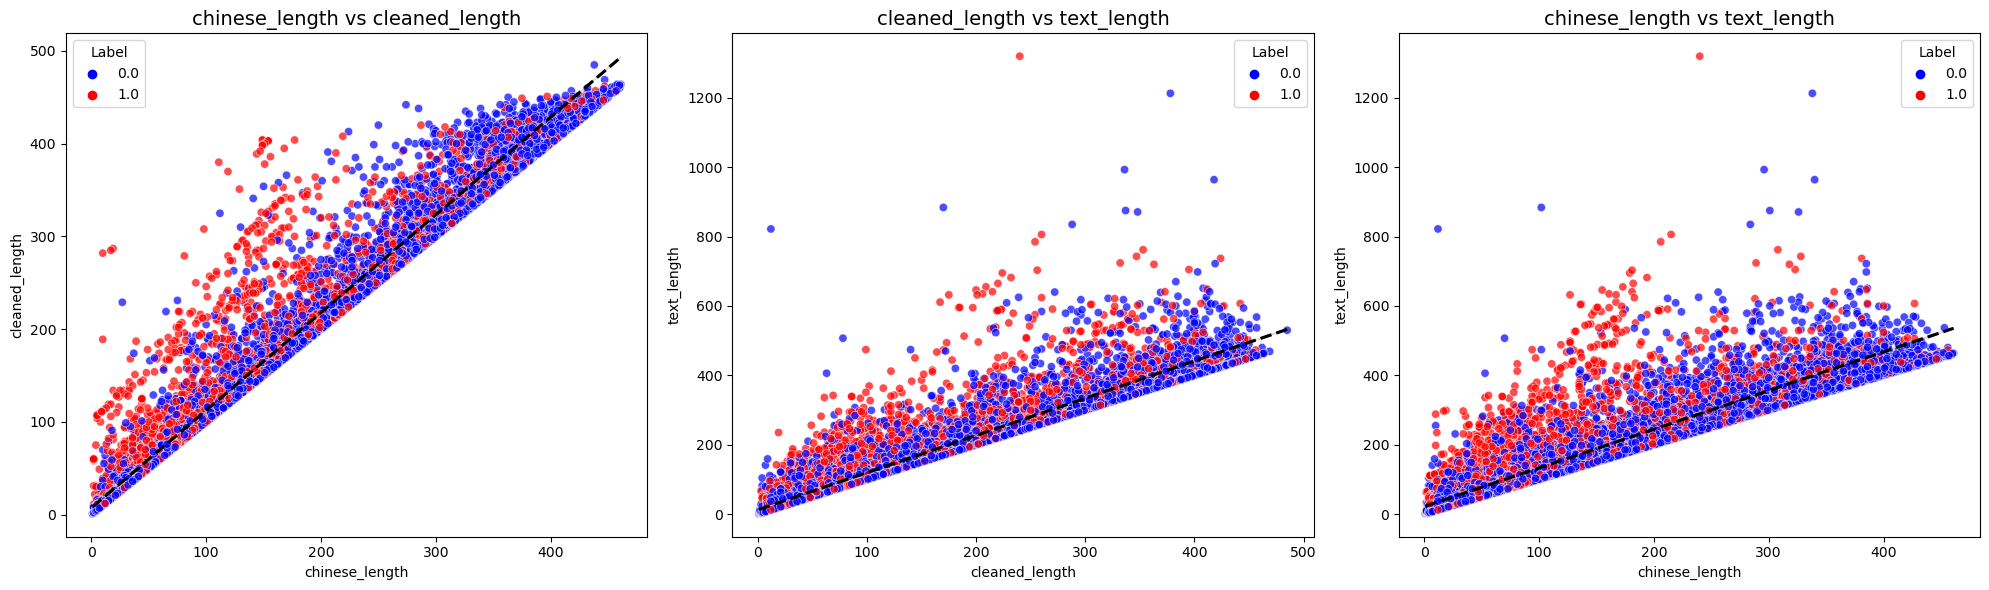

In [34]:
# 設定變數組合（兩兩比對）
feature_pairs = [
    ("chinese_length", "cleaned_length"),
    ("cleaned_length", "text_length"),
    ("chinese_length", "text_length")
]

# 建立 1x3 子圖
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 顏色設定（label=0: 藍色, label=1: 紅色）
label_palette = {0: "blue", 1: "red"}

# 依序繪製散點圖
for i, (x_feature, y_feature) in enumerate(feature_pairs):
    ax = axes[i]
    sns.scatterplot(
        data=data, x=x_feature, y=y_feature, hue="label",
        palette=label_palette, alpha=0.7, ax=ax
    )
    sns.regplot(
        data=data, x=x_feature, y=y_feature, scatter=False, ax=ax,
        color="black", line_kws={"linestyle": "dashed"}
    )

    # 設定標題與軸標籤
    ax.set_title(f"{x_feature} vs {y_feature}", fontsize=14)
    ax.set_xlabel(x_feature)
    ax.set_ylabel(y_feature)
    ax.legend(title="Label")

# 調整佈局
plt.tight_layout()
plt.show()

In [35]:
data[data['chinese_length'] < 10]['chinese_text']

0             流量密碼
5         追星女的摩斯密碼
10           密碼是日期
14          密碼洩漏危機
21         申請密碼是名稱
           ...    
15805      努力賺錢用力玩
15807    因為妳一直在用手機
15827        我也想賺錢
15838     自己手機較好看齁
15842      好好工作賺錢吧
Name: chinese_text, Length: 895, dtype: object

In [36]:
# short_text_10_data = data[data['chinese_length'] < 10][['label', 'explination', 'text']]

# # 指定輸出檔案名稱
# output_path = "short_chinese_text_10.csv"

# # 儲存為 CSV
# short_text_10_data.to_csv(output_path, index=False, encoding="utf-8")

# print(f"檔案已儲存為 {output_path}")

檔案已儲存為 short_chinese_text_10.csv


In [37]:
short_text_10_data = data[data['text_length'] < 10][['label', 'explination', 'text']]

# 指定輸出檔案名稱
output_path = "short_text_10.csv"

# 儲存為 CSV
short_text_10_data.to_csv(output_path, index=False, encoding="utf-8")

print(f"檔案已儲存為 {output_path}")

檔案已儲存為 short_text_10.csv


In [39]:
data[data['text_length'] > 500]['chinese_text']

158      前兩天中了流量密碼被某台灣人罵死了我真係好想屌柒班人不過諗諗下世上總有多謝的出現可以比人用文...
236      我能有機會找到幸福嗎原本月中要回街上的無尾熊因為寒流延後原放希望僅剩時間能有認養人出現地點在...
980                                           點愛心會變色很玄流量密碼
1019     再見不再見意外篇沖好涼洗好啲邊爐料點鐘終於可以一齊坐低一路煲劇一路烚吓烚吓其實我都好期待同嘅...
1160     下班時間幫同事回答阿嬤的停車費問題大夜幫客人操作按停車費卻發現他的是私人停車場的繳費單沒辦法...
                               ...                        
15510    今天跟前同事暢聊很愉快愛賺錢喜歡靠自己的女生聊在一起就是開心期間帶到我前男友前男友媽媽超級喜...
15601    孤兒小孩拿著明年寒假的冬令營的報名表其實是安親班取好聽一點的名稱冬令營我可不可以不要參加可是...
15725    抱怨一下為什麼以前的應援都不用錢現在卻都要收費因為我不想再做公益用愛發電了從矮丸開始做到現在...
15776    摁小公主被請回來後更囂張巨嬰公主阿姨同事早安好久不見是我媽拜託我回來的呃是喔她說妳們忙不過來...
15831    窮著養有時候接小鬼下課時他上車都會問媽咪今天妳賺多少錢了啊嗯今天有收到訂單喔哇又是大訂單嗎妳...
Name: chinese_text, Length: 229, dtype: object

In [40]:
data[data['text_length'] > 500]['chinese_text'].iloc[0]

'前兩天中了流量密碼被某台灣人罵死了我真係好想屌柒班人不過諗諗下世上總有多謝的出現可以比人用文字發洩下一千幾百真係唔係咩錢仲要係台幣居然講到比人命重要我依然相信死者都唔想搞到咁唔係人人都識做生意人都死左仲要用文字鞭屍不過唔緊要都睇唔到係囉係我錯一單工作做兩小時就搵到過萬台幣所以唔知民間苦況買得蛋糕都唔係窮到無飯食嘅人啦唔通呃完錢帶埋落棺材會用到咩要鬧人更難聽更仆街我強項屌人屌左幾十年經驗豐富身經百戰反正我死後落硬地獄原本真係想全力開火不過呢兩日想買泰妹版時間都花在網購上十萬人睇過都係一小部份人罵我啫唔痕唔痛架'

In [41]:
# # 過濾出 text_length > 500 的資料
# filtered_data = data[data['text_length'] > 500][['label', 'explination', 'text']]

# # 指定輸出檔案名稱
# output_path = "long_text_over_500.csv"

# # 儲存為 CSV
# filtered_data.to_csv(output_path, index=False, encoding="utf-8")

# print(f"檔案已儲存為 {output_path}")


檔案已儲存為 long_text_over_500.csv


In [42]:
# explination_data = data[['explination']].dropna()

# # 指定輸出檔案名稱
# output_path = "explination.csv"

# # 儲存為 CSV
# explination_data.to_csv(output_path, index=False, encoding="utf-8")

# print(f"檔案已儲存為 {output_path}")

檔案已儲存為 explination.csv


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\clair\AppData\Local\Temp\jieba.cache
Loading model cost 0.794 seconds.
Prefix dict has been built successfully.


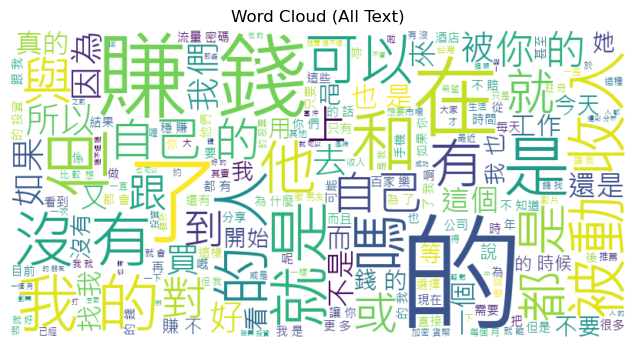

In [43]:
# 合併所有 text
all_text = " ".join(data["chinese_text"])

# 使用 jieba 進行斷詞
words_all = " ".join(jieba.cut(all_text))

# 建立文字雲物件
wordcloud_all = WordCloud(font_path="msjh.ttc", width=800, height=400, background_color="white").generate(words_all)

# 繪製文字雲
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_all, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud (All Text)")
plt.show()

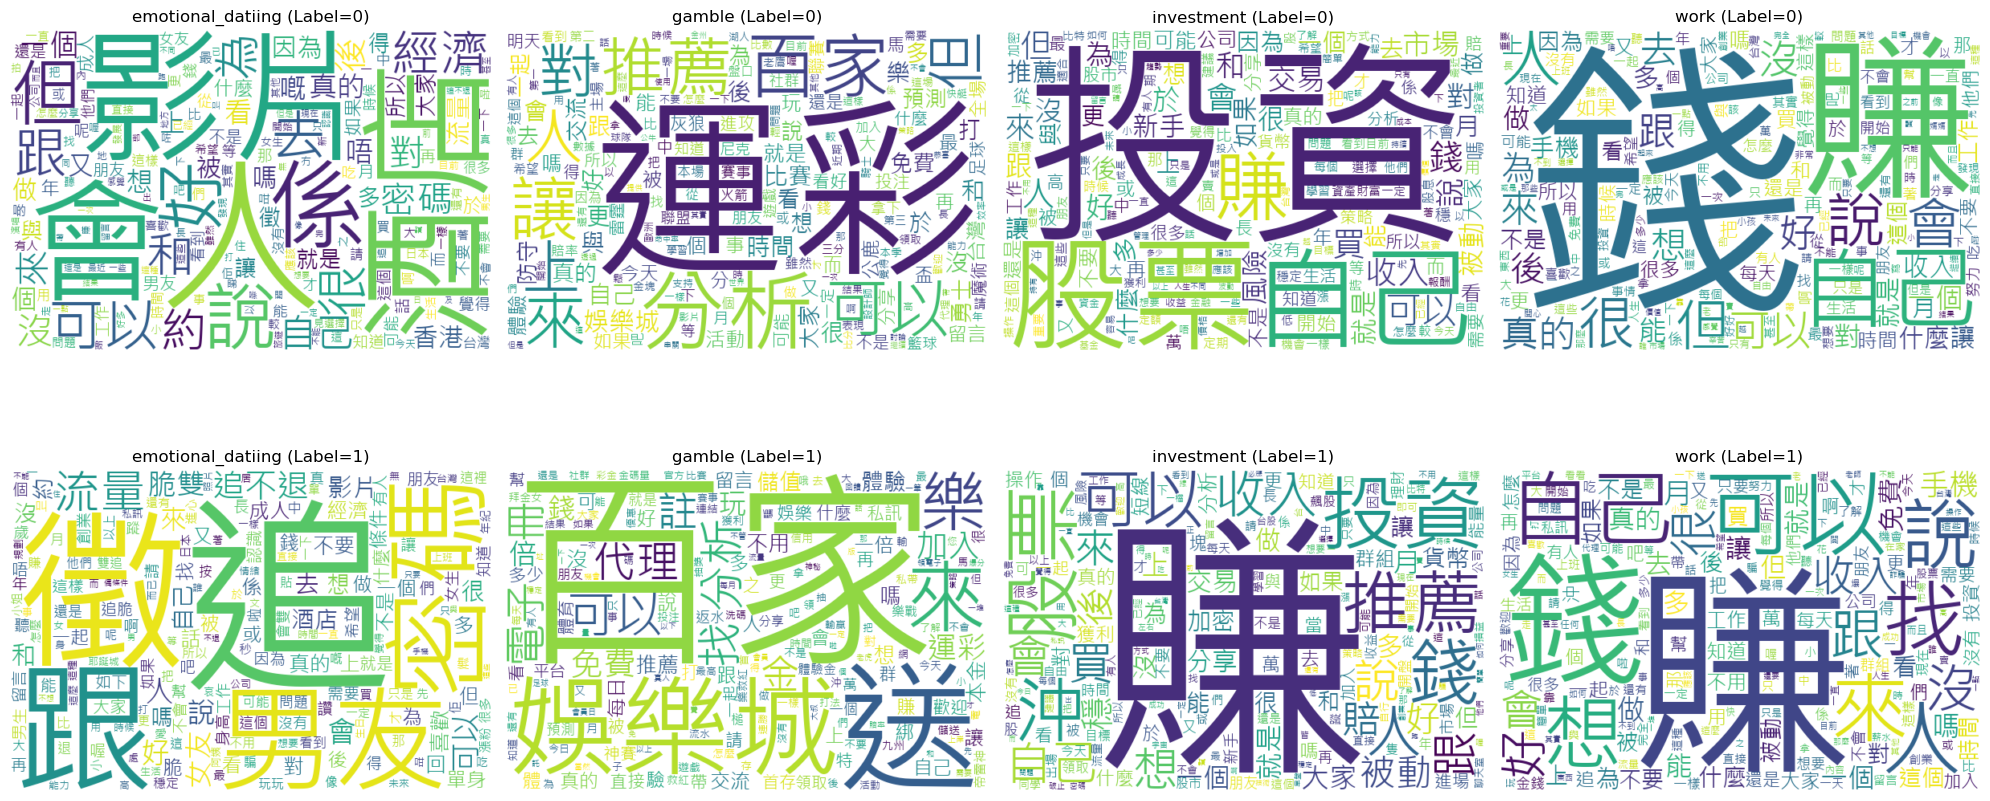

In [44]:
# 設定分類與標籤
categories = ['emotional_datiing', 'gamble', 'investment', 'work']
labels = [0, 1]
custom_stopwords = {"我", "的", "了", "是", "在", "都", "我們", "你", "他", "妳", "她", "有", "就", "也", "不", "要", "到"}  # <- 這裡放你要過濾的詞

# 建立圖表
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for row, label in enumerate(labels):
    for col, category in enumerate(categories):
        # 取得該分類與標籤的文本
        text = " ".join(data[(data["label"] == label) & (data["category"] == category)]["chinese_text"])

        # 斷詞
        words = list(jieba.cut(text))

        # 過濾 Stop Words
        filtered_words = [word for word in words if word not in custom_stopwords]

        # 計算詞頻
        word_count = Counter(filtered_words)

        # 生成文字雲
        wordcloud = WordCloud(font_path="msjh.ttc", width=600, height=400, background_color="white").generate_from_frequencies(word_count)

        # 繪製文字雲
        ax = axes[row, col]
        ax.imshow(wordcloud, interpolation="bilinear")
        ax.axis("off")
        ax.set_title(f"{category} (Label={label})")

# 調整佈局
plt.tight_layout()
plt.show()


In [45]:
# # 過濾出 text_length > 500 的資料
# filtered_data = data[data['text'].str.count('娛樂城') > 0][['label', 'explination', 'text']]

# # 指定輸出檔案名稱
# output_path = "text_娛樂城.csv"

# # 儲存為 CSV
# filtered_data.to_csv(output_path, index=False, encoding="utf-8")

# print(f"檔案已儲存為 {output_path}")

檔案已儲存為 text_娛樂城.csv


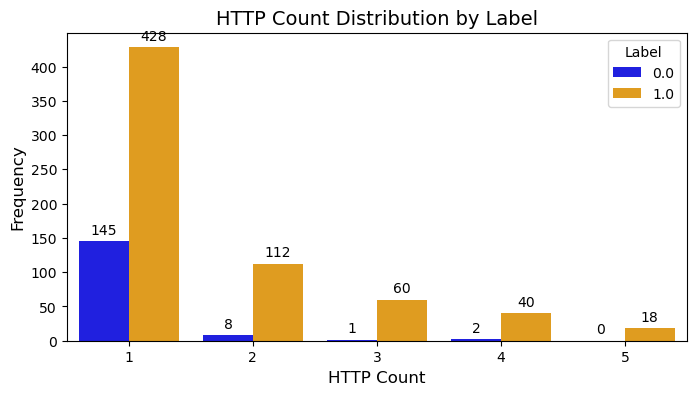

In [46]:
# 設定圖表大小
plt.figure(figsize=(8, 4))

# 繪製 http_count 的數量分布（依 label 區分）
sns.countplot(data=data[data['http_count'] > 0], x="http_count", hue="label", palette={0: "blue", 1: "orange"})

# 設定標題與軸標籤
plt.title("HTTP Count Distribution by Label", fontsize=14)
plt.xlabel("HTTP Count", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="Label")

# 顯示數值標記
for container in plt.gca().containers:
    plt.bar_label(container, fmt="%d", fontsize=10, padding=3)

# 顯示圖表
plt.show()

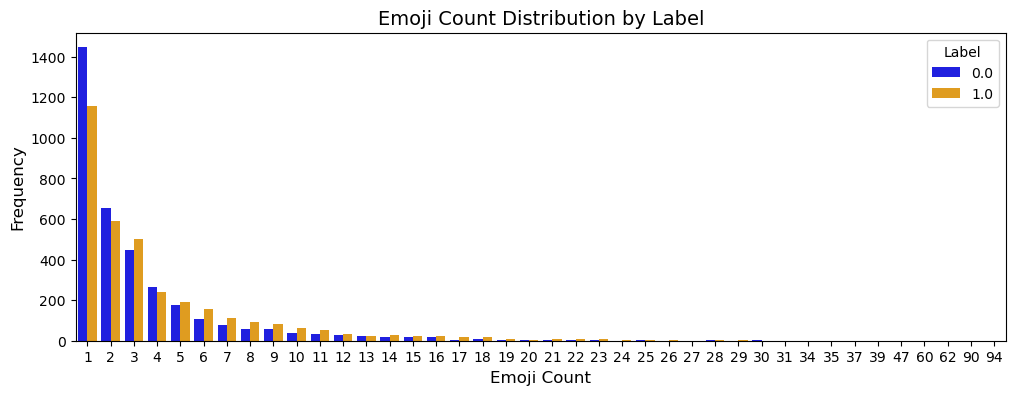

In [47]:
# 設定圖表大小
plt.figure(figsize=(12, 4))

# 繪製 http_count 的數量分布（依 label 區分）
sns.countplot(data=data[data['emoji_count'] > 0], x="emoji_count", hue="label", palette={0: "blue", 1: "orange"})

# 設定標題與軸標籤
plt.title("Emoji Count Distribution by Label", fontsize=14)
plt.xlabel("Emoji Count", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="Label")

# 顯示圖表
plt.show()

In [48]:
# # 過濾出 text_length > 500 的資料
# filtered_data = data[(data['http_count'] > 0) & (data['label'] == 0)][['label', 'explination', 'text']]

# # 指定輸出檔案名稱
# output_path = "text_網址.csv"

# # 儲存為 CSV
# filtered_data.to_csv(output_path, index=False, encoding="utf-8")

# print(f"檔案已儲存為 {output_path}")

檔案已儲存為 text_網址.csv
